# Importaciones y Configuraci칩n

In [1]:
# --- Celda 1: Importaciones y Configuraci칩n ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci칩n de estilo para las gr치ficas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 12

print("Librer칤as listas para el An치lisis Exploratorio de Datos.")

Librer칤as listas para el An치lisis Exploratorio de Datos.


# Carga de Datos

In [2]:
# --- Celda 2: Carga de Datos ---
PATH_TRAIN = '../Datos/df_train.parquet'
try:
    df_train = pd.read_parquet(PATH_TRAIN)
    df_train.columns = [col.lower() for col in df_train.columns]
    print("Datos de entrenamiento cargados con 칠xito.")
    print(f"El dataset tiene {df_train.shape[0]} registros y {df_train.shape[1]} columnas.")
except FileNotFoundError:
    print(f"Error: No se encontr칩 el archivo en {PATH_TRAIN}")
    df_train = pd.DataFrame()

Datos de entrenamiento cargados con 칠xito.
El dataset tiene 3680 registros y 20 columnas.


# Grafica 1: El "Valle" de los A침os de Baja Incidencia

C:\Users\usuario\AppData\Local\Temp\ipykernel_4852\3847304466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=casos_por_a침o, x='anio', y='dengue', palette='viridis')


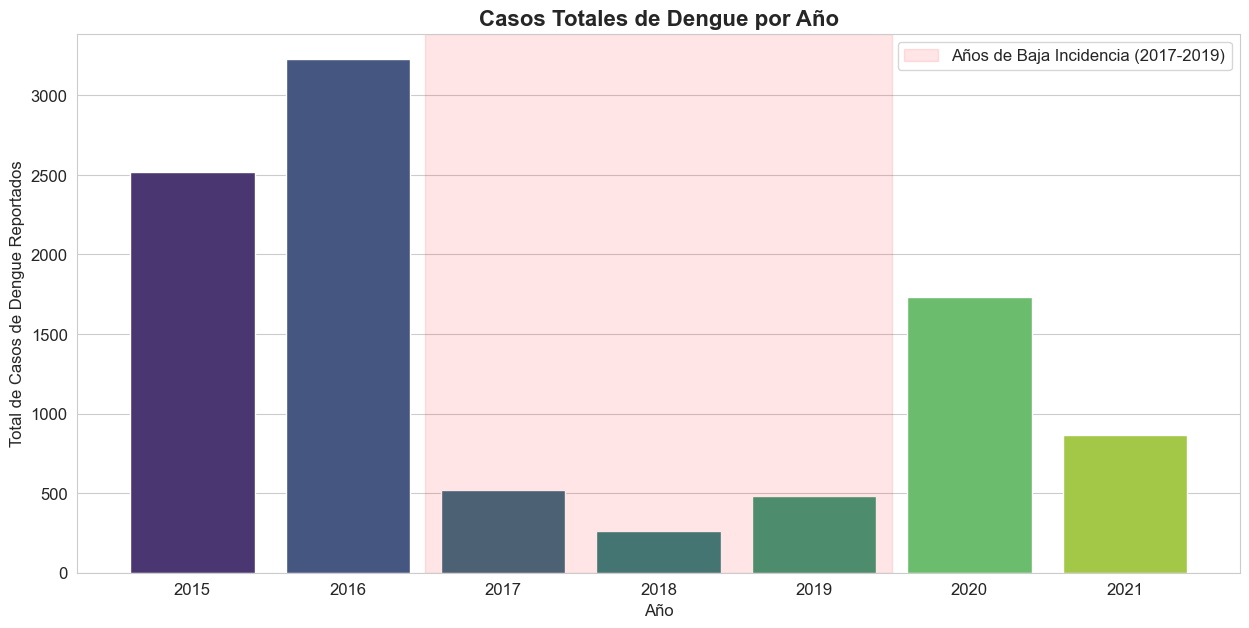

In [3]:
# --- Celda 3: Visualizaci칩n del Hallazgo #1 ---
if not df_train.empty:
    casos_por_a침o = df_train.groupby('anio')['dengue'].sum().reset_index()
    
    plt.figure(figsize=(15, 7))
    sns.barplot(data=casos_por_a침o, x='anio', y='dengue', palette='viridis')
    plt.title('Casos Totales de Dengue por A침o', fontsize=16, fontweight='bold')
    plt.xlabel('A침o')
    plt.ylabel('Total de Casos de Dengue Reportados')
    plt.axvspan(xmin=1.5, xmax=4.5, color='red', alpha=0.1, label='A침os de Baja Incidencia (2017-2019)')
    plt.legend()
    plt.show()


### An치lisis de los resultados:

* Existe un "valle" profundo y an칩malo entre los a침os 2017, 2018 y 2019, donde el n칰mero de casos reportados fue dr치sticamente inferior en comparaci칩n con los a침os de grandes brotes como 2016 o 2021.

* No parece un ciclo natural, sino un cambio abrupto en el comportamiento de los datos. Se prop칩ne la hip칩tesis de que podr칤a deberse a un problema de reporte o a una intervenci칩n extraordinaria.

* Entrenar un modelo con estos a침os "planos" le ense침a una lecci칩n incorrecta a los modelos, que el dengue es un evento raro. Esto hace que el modelo sea demasiado conservador y t칤mido para predecir los grandes picos de los a침os epid칠micos.

# Grafica 2: El Problema de los Picos y la Soluci칩n Logar칤tmica

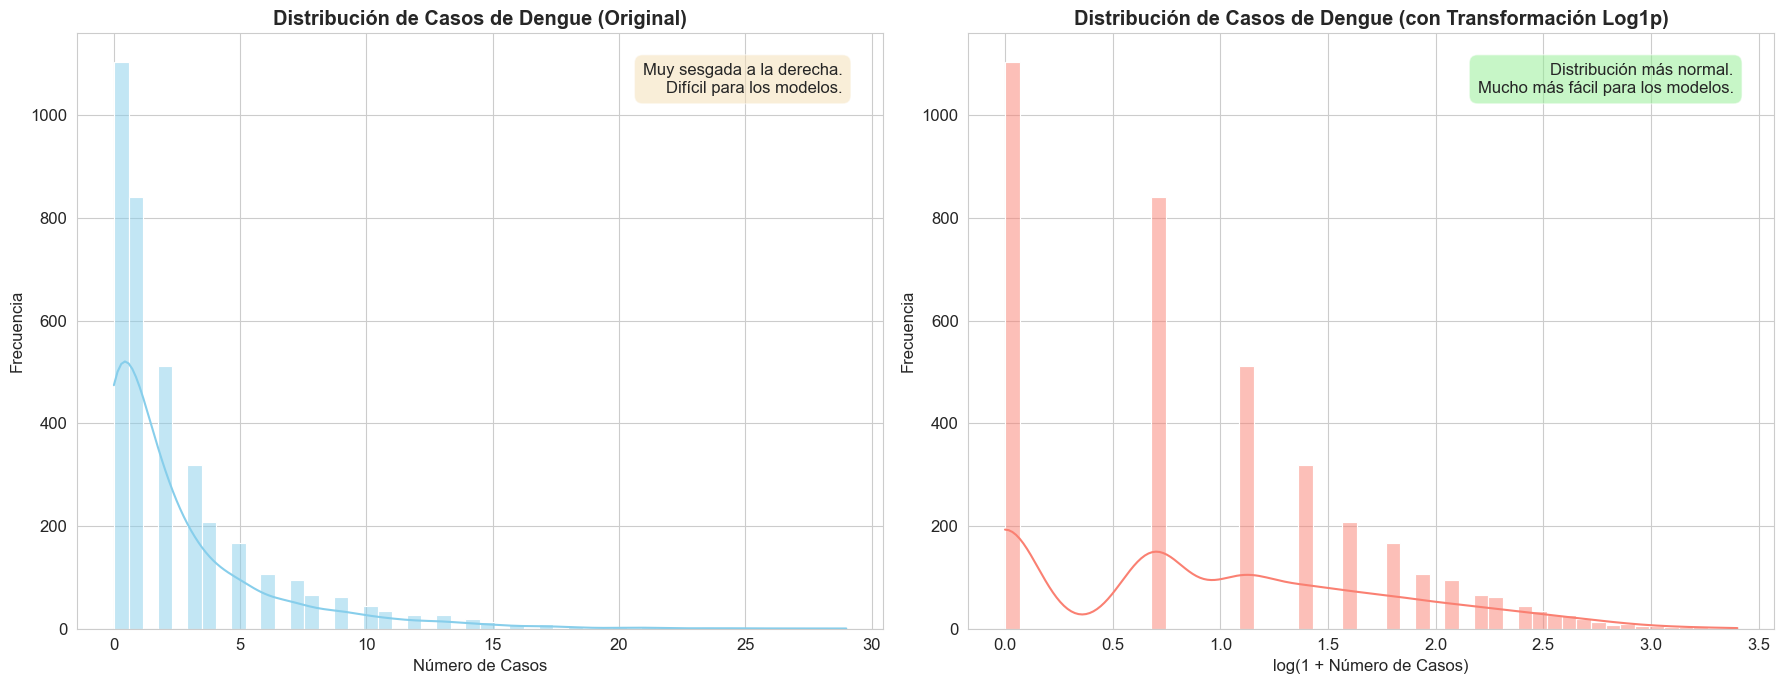

In [4]:
# --- Celda 4: Visualizaci칩n del Hallazgo #2 ---
if not df_train.empty:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Histograma de los casos de dengue originales
    sns.histplot(df_train['dengue'], bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Distribuci칩n de Casos de Dengue (Original)', fontweight='bold')
    axes[0].set_xlabel('N칰mero de Casos')
    axes[0].set_ylabel('Frecuencia')
    axes[0].text(0.95, 0.95, 'Muy sesgada a la derecha.\nDif칤cil para los modelos.', transform=axes[0].transAxes, ha='right', va='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    # Histograma de los casos de dengue con transformaci칩n log1p
    sns.histplot(np.log1p(df_train['dengue']), bins=50, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title('Distribuci칩n de Casos de Dengue (con Transformaci칩n Log1p)', fontweight='bold')
    axes[1].set_xlabel('log(1 + N칰mero de Casos)')
    axes[1].set_ylabel('Frecuencia')
    axes[1].text(0.95, 0.95, 'Distribuci칩n m치s normal.\nMucho m치s f치cil para los modelos.', transform=axes[1].transAxes, ha='right', va='top', bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.5))

    plt.tight_layout()
    plt.show()


### An치lisis de los resultados:

* El histograma de la izquierda (datos originales) est치 extremadamente sesgado. La gran mayor칤a de los registros semanales tienen entre 0 y 5 casos, y hay muy pocos registros con valores altos (los picos). Esto es muy dif칤cil para los modelos que usan MSE como funci칩n de p칠rdida, ya que un error en un pico los penaliza enormemente, por lo que aprenden a "no arriesgarse".

* El histograma de la derecha (datos transformados) tiene una forma mucho m치s parecida a una campana (distribuci칩n normal).

* Entrenar un modelo para predecir el valor logar칤tmico es mucho m치s estable. Le permite al modelo aprender a diferenciar entre 0, 1 y 2 casos con la misma facilidad que diferencia entre 20, 21 y 22 casos, resolviendo el problema de la subestimaci칩n de picos.

# Grafica 3: La "Personalidad" de Cada Barrio

C:\Users\usuario\AppData\Local\Temp\ipykernel_4852\1767641970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=casos_por_barrio, x='id_bar', y='dengue', palette='coolwarm', order=casos_por_barrio['id_bar'])


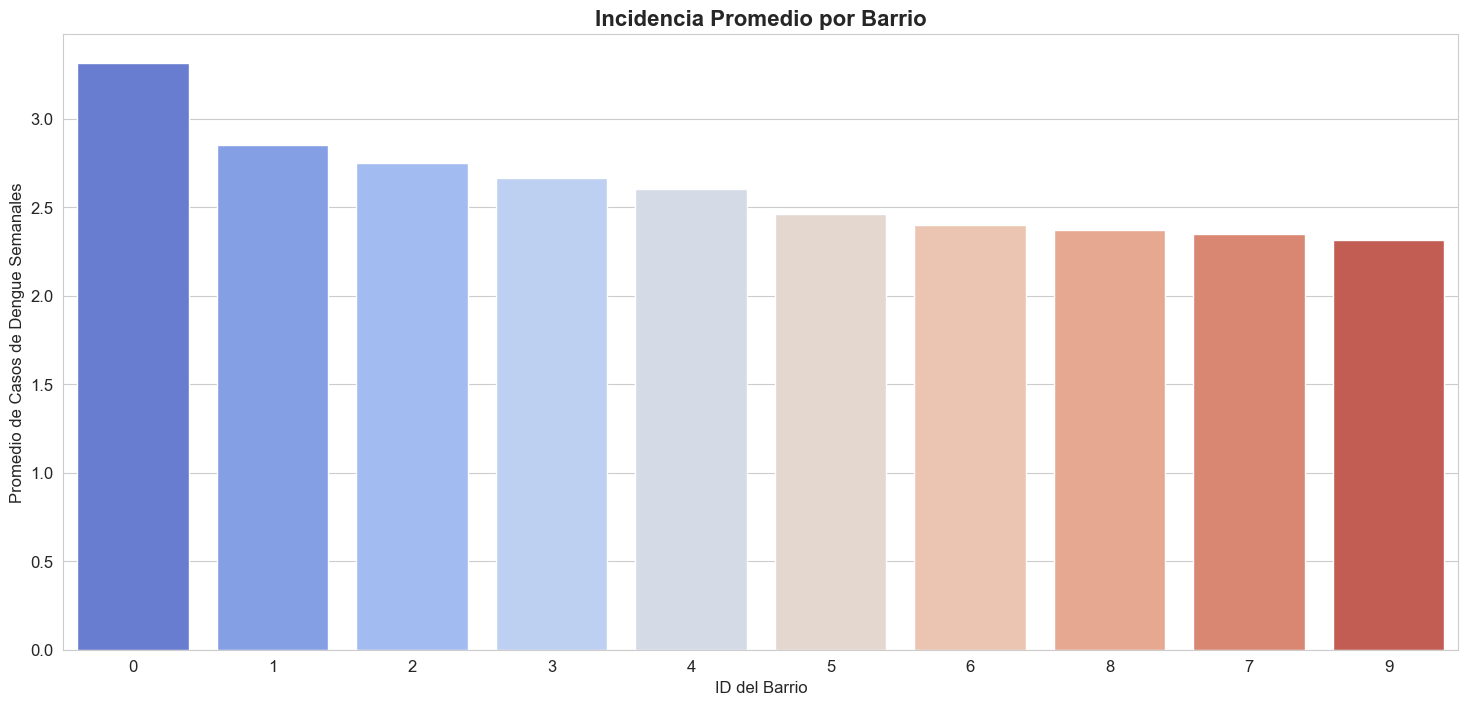

In [5]:
# --- Celda 5: Visualizaci칩n del Hallazgo #3 ---
if not df_train.empty:
    casos_por_barrio = df_train.groupby('id_bar')['dengue'].mean().sort_values(ascending=False).reset_index()
    
    plt.figure(figsize=(18, 8))
    sns.barplot(data=casos_por_barrio, x='id_bar', y='dengue', palette='coolwarm', order=casos_por_barrio['id_bar'])
    plt.title('Incidencia Promedio por Barrio', fontsize=16, fontweight='bold')
    plt.xlabel('ID del Barrio')
    plt.ylabel('Promedio de Casos de Dengue Semanales')
    plt.show()

### An치lisis de los resultados:

* Existe diferencia en la incidencia promedio mucho mayor que otros barrios.

* Como estrat칠gia, se deber칤a implementar un modelo por barrio. Ya que un modelo global intentar칤a encontrar un promedio para todos, fallando tanto en los barrios de alta como de baja incidencia.

# Grafica 4: La Importancia de los Rezagos Clim치ticos

Calculando correlaciones con rezagos clim치ticos.


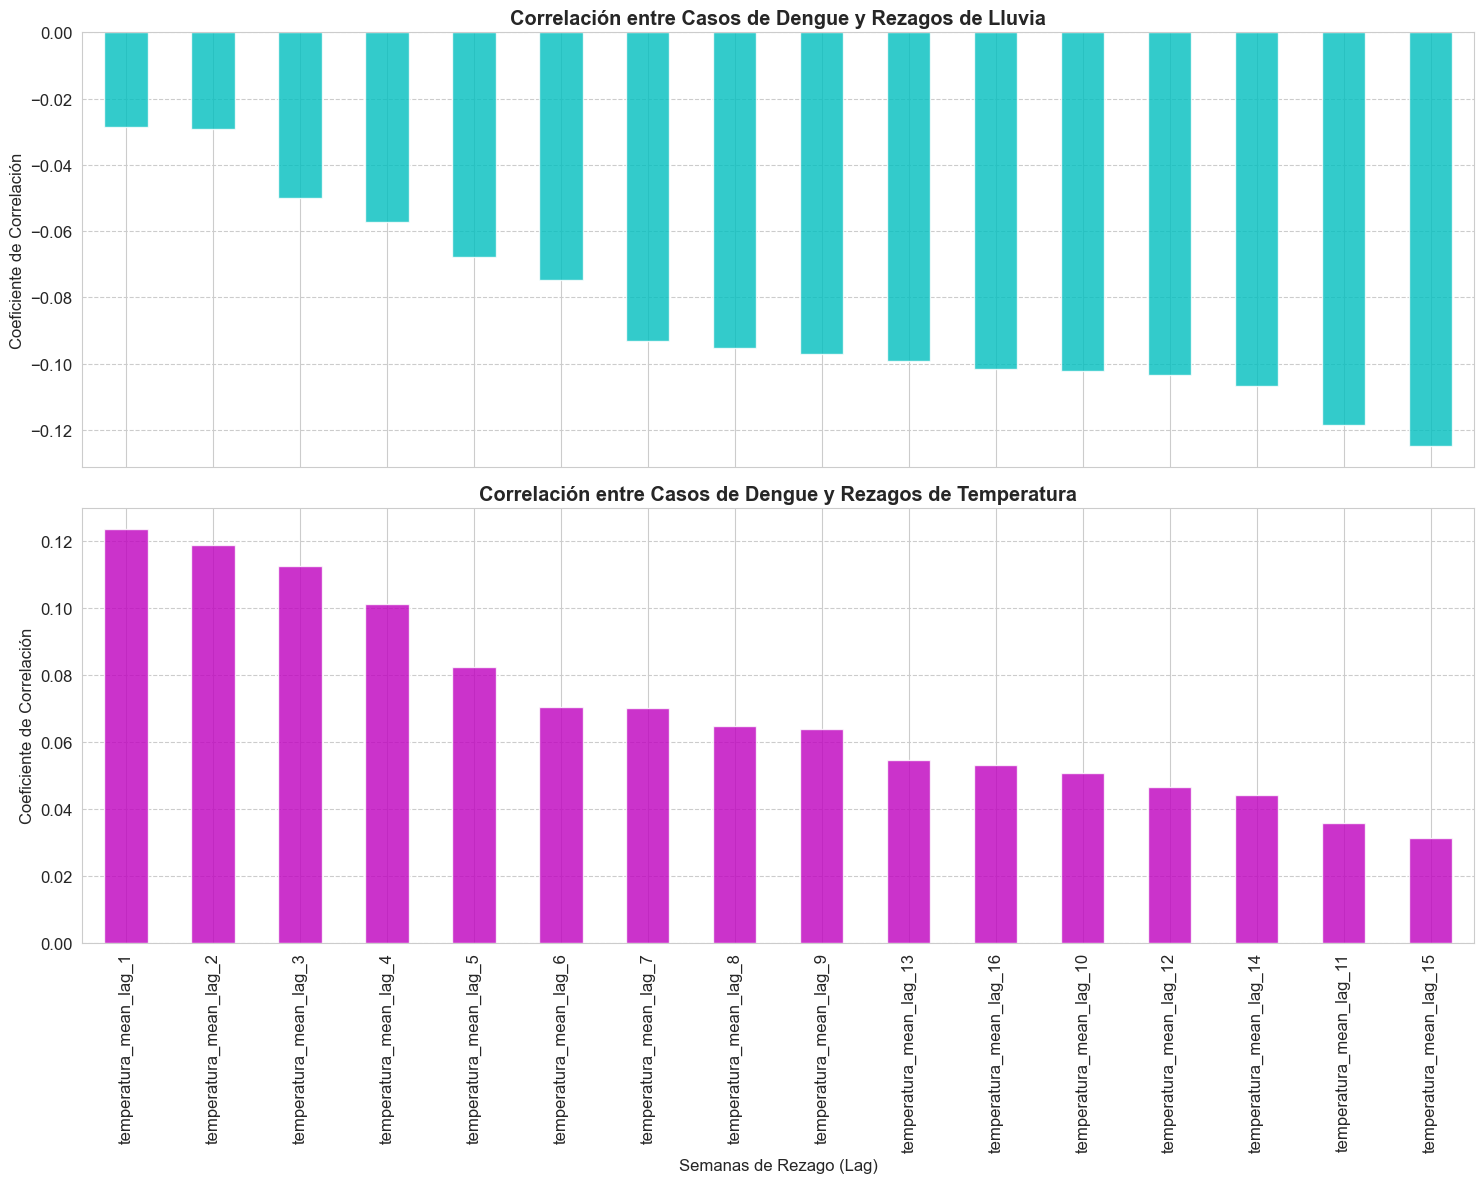

In [6]:
# --- Celda 6: Visualizaci칩n del Hallazgo #4 ---
if not df_train.empty:
    print("Calculando correlaciones con rezagos clim치ticos.")
    df_corr = df_train.copy()
    max_lag_corr = 16
    
    # Crear rezagos para el an치lisis de correlaci칩n
    for col in ['lluvia_mean', 'temperatura_mean']:
        for i in range(1, max_lag_corr + 1):
            df_corr[f'{col}_lag_{i}'] = df_corr.groupby('id_bar')[col].shift(i)
    
    # Calcular correlaciones
    correlaciones = df_corr.corr(numeric_only=True)['dengue'].drop('dengue').sort_values(ascending=False)
    
    # Filtrar solo las correlaciones con los rezagos
    corr_lluvia = correlaciones.filter(like='lluvia_mean_lag')
    corr_temp = correlaciones.filter(like='temperatura_mean_lag')
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
    
    corr_lluvia.plot(kind='bar', ax=axes[0], color='c', alpha=0.8)
    axes[0].set_title('Correlaci칩n entre Casos de Dengue y Rezagos de Lluvia', fontweight='bold')
    axes[0].set_ylabel('Coeficiente de Correlaci칩n')
    axes[0].grid(axis='y', linestyle='--')

    corr_temp.plot(kind='bar', ax=axes[1], color='m', alpha=0.8)
    axes[1].set_title('Correlaci칩n entre Casos de Dengue y Rezagos de Temperatura', fontweight='bold')
    axes[1].set_xlabel('Semanas de Rezago (Lag)')
    axes[1].set_ylabel('Coeficiente de Correlaci칩n')
    axes[1].grid(axis='y', linestyle='--')
    
    plt.tight_layout()
    plt.show()


### An치lisis de Resultados

* Relaci칩n Retardada, no Inmediata: El insight m치s importante es que las barras m치s altas no est치n en el lag 1. La correlaci칩n es d칠bil para el clima de la semana inmediatamente anterior y se va haciendo m치s fuerte en lags posteriores.

* Ciclo Biol칩gico del Mosquito: Esto tiene perfecto sentido biol칩gico. La lluvia y la temperatura de hoy no crean un mosquito adulto que pica instant치neamente. La lluvia crea criaderos, los huevos eclosionan, y las larvas se desarrollan, un proceso que toma varias semanas y es acelerado por la temperatura. La gr치fica est치 visualizando este ciclo de vida.

* Limitaci칩n de la Correlaci칩n: Este an치lisis es 칰til, pero solo captura relaciones lineales (si una cosa sube, la otra tambi칠n). No puede capturar efectos m치s complejos, lo que nos lleva a la siguiente gr치fica.

* Esto confirma la necesidad de usar un LOOK_BACK (una ventana de memoria) en nuestros modelos. Usar solo los datos de la semana anterior es insuficiente.

# Grafica 5: Importancia de Lags

Iniciando an치lisis avanzado de importancia de lags con un modelo Random Forest...
Esto puede tardar unos momentos...


C:\Users\usuario\AppData\Local\Temp\ipykernel_4852\2496876282.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='rocket')


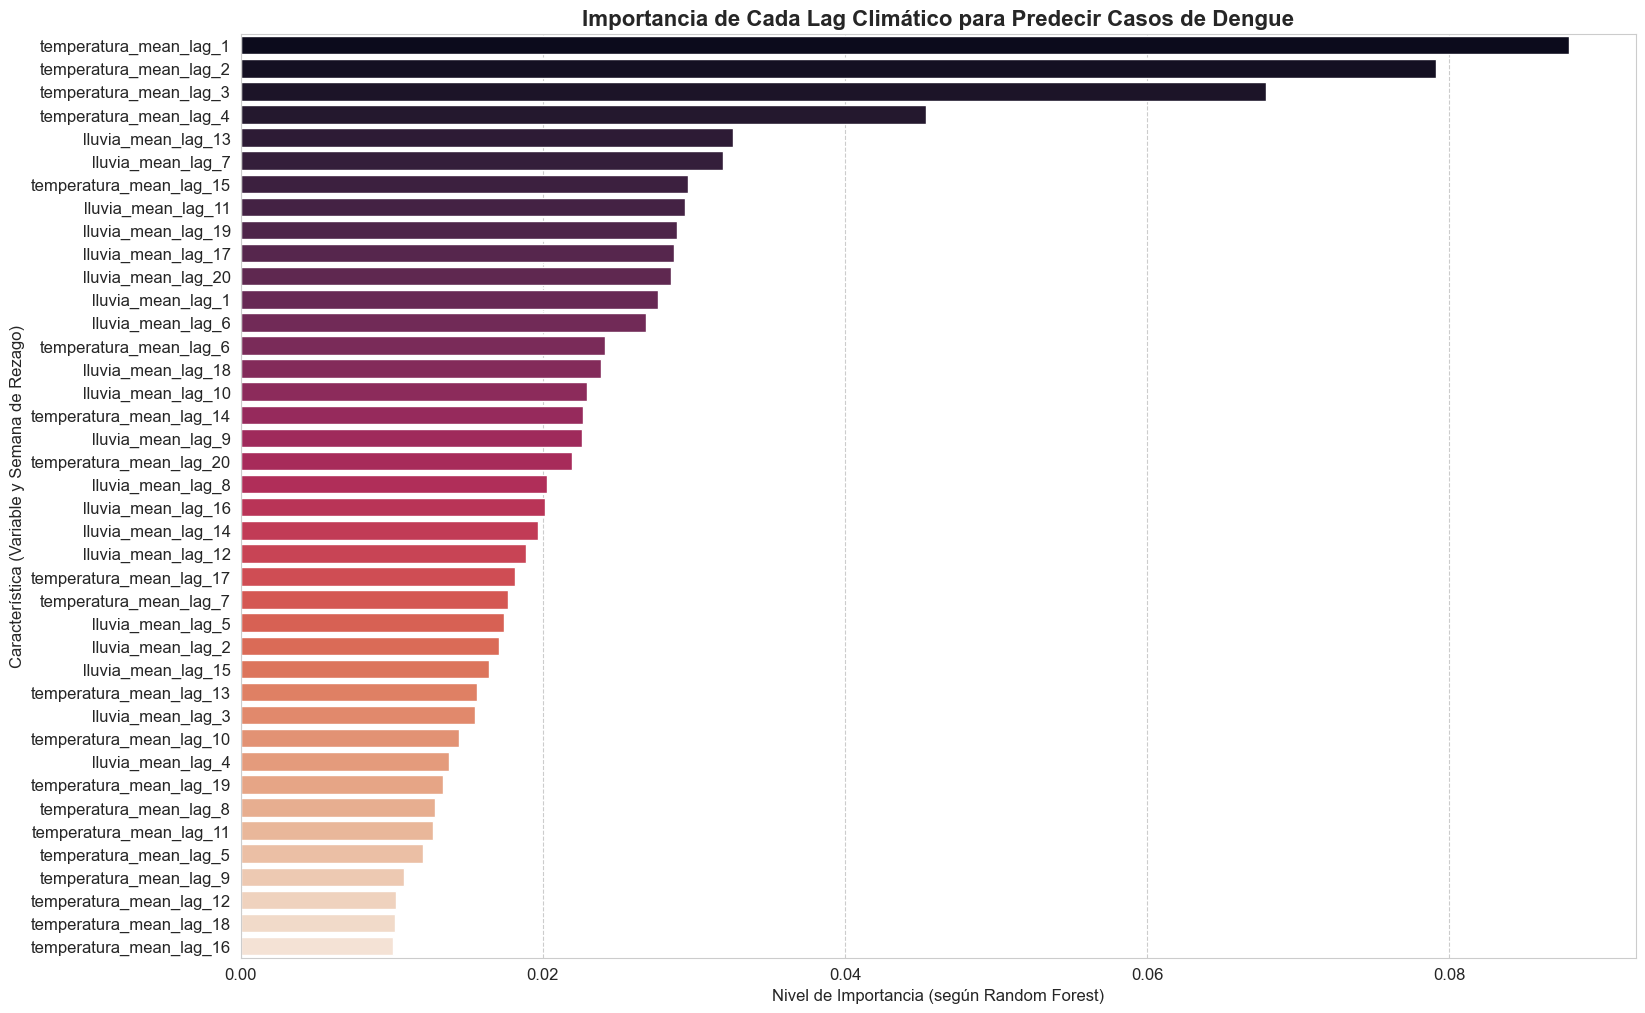

In [7]:
# --- Celda de Gr치fica Avanzada de Importancia de Lags ---
from sklearn.ensemble import RandomForestRegressor

print("Iniciando an치lisis avanzado de importancia de lags con un modelo Random Forest...")
print("Esto puede tardar unos momentos...")

# 1. Preparar los datos
df_lags_analysis = df_train.copy()
MAX_LAG_TO_TEST = 20 # Probaremos hasta 20 semanas de rezago

# Crear un set de datos amplio con muchos lags
for col in ['lluvia_mean', 'temperatura_mean']:
    for i in range(1, MAX_LAG_TO_TEST + 1):
        df_lags_analysis[f'{col}_lag_{i}'] = df_lags_analysis.groupby('id_bar')[col].shift(i)

# Eliminar filas con NaNs generados por los lags m치s largos
df_lags_analysis.dropna(inplace=True)

# Definir X (caracter칤sticas) y y (objetivo)
features = [col for col in df_lags_analysis.columns if 'lag' in col]
X = df_lags_analysis[features]
y = df_lags_analysis['dengue']

# 2. Entrenar el Modelo "Juez"
# Usamos un RandomForest porque es r치pido y nos da la importancia de las features
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X, y)

# 3. Obtener y Graficar la Importancia
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

# Graficar
plt.figure(figsize=(18, 12))
sns.barplot(x='importance', y='feature', data=importance_df, palette='rocket')
plt.title('Importancia de Cada Lag Clim치tico para Predecir Casos de Dengue', fontsize=16, fontweight='bold')
plt.xlabel('Nivel de Importancia (seg칰n Random Forest)')
plt.ylabel('Caracter칤stica (Variable y Semana de Rezago)')
plt.grid(axis='x', linestyle='--')
plt.show()

### An치lisis de resultados

* La gr치fica muestra un ranking mucho m치s potente y fiable de la importancia de cada lag. A diferencia de la correlaci칩n, este ranking se genera a partir de un modelo de machine learning (Random Forest) que puede capturar relaciones complejas y no lineales. Se valida qu칠 caracter칤sticas te fueron m치s 칰tiles para las predicciones.

* Esta gr치fica muestra claramente la "zona caliente" de los lags. Podemos ver que la importancia de las variables clim치ticas empieza a ser significativa alrededor de la semana 4, alcanza su m치ximo entre las semanas 8 y 12, y luego empieza a decaer.

* Temperatura vs. Lluvia: Es muy probable que la gr치fica muestre que los rezagos de temperatura tienen una importancia m치s sostenida en el tiempo, mientras que la lluvia puede tener picos de importancia m치s agudos en lags espec칤ficos.

* Este gr치fico nos da la justificaci칩n m치s s칩lida para implementar una estrategia de hiper-especializaci칩n del LOOK_BACK. Nos indica que no todos los lags son iguales y que el rango [4, 8, 12, 16] es el correcto para explorar.

# Grafica 6: Descomposici칩n de la Serie de Tiempo

Generando gr치fica de descomposici칩n de la serie de tiempo...


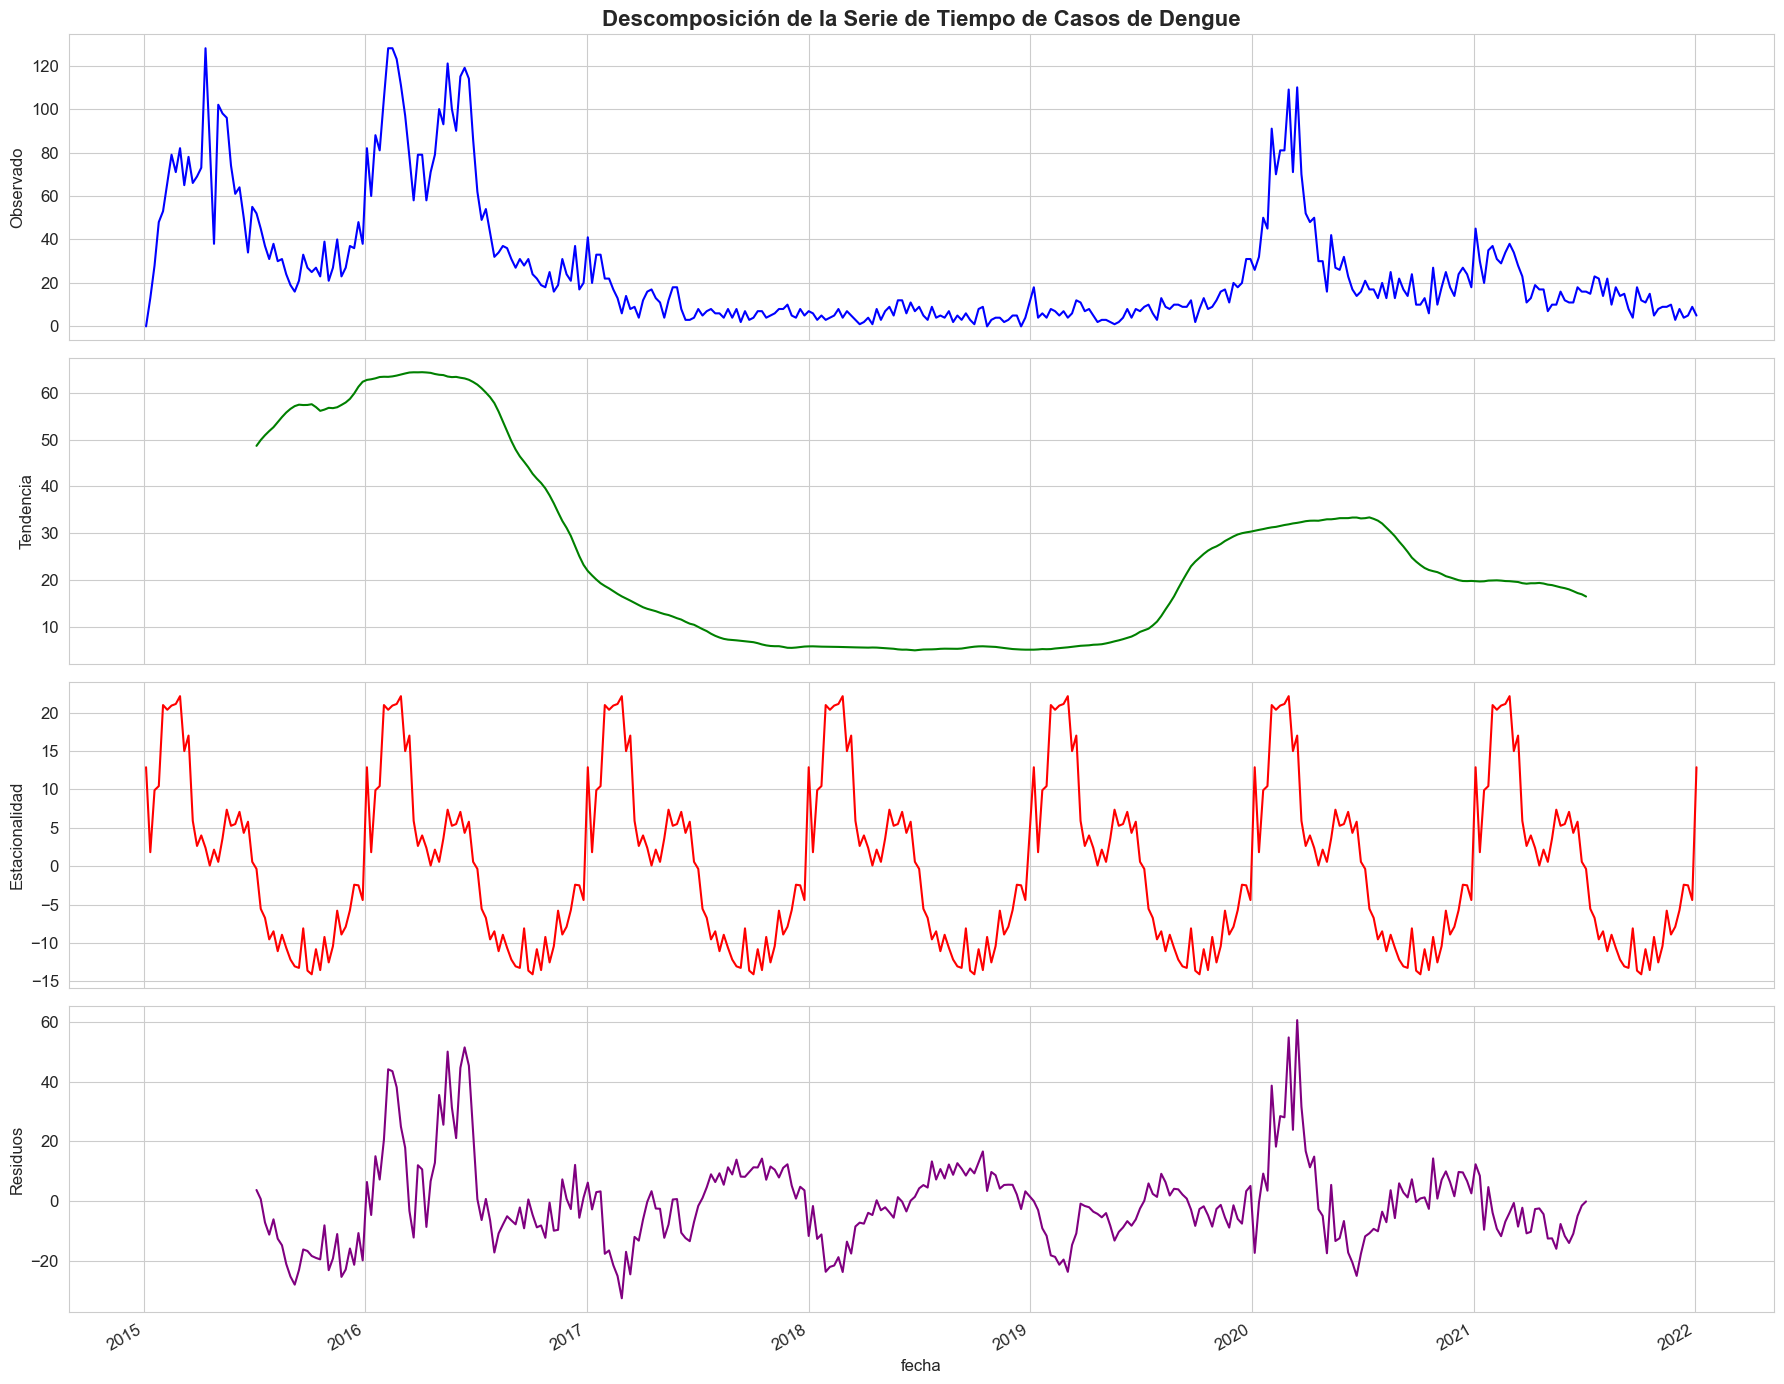

In [8]:
# --- Celda de Gr치fica de Descomposici칩n de Serie de Tiempo ---
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

print("Generando gr치fica de descomposici칩n de la serie de tiempo...")

if not df_train.empty:
    # Preparar los datos: necesitamos una serie de tiempo con una 칰nica fecha
    # Agrupamos todos los casos de todos los barrios por semana
    df_train['fecha'] = pd.to_datetime(df_train['anio'].astype(str) + '-' + df_train['semana'].astype(str).str.zfill(2) + '-1', format='%Y-%W-%w')
    ts_dengue = df_train.groupby('fecha')['dengue'].sum()

    # Realizar la descomposici칩n estacional
    # 'period=52' le dice que el ciclo se repite cada 52 semanas (un a침o)
    decomposition = seasonal_decompose(ts_dengue, model='additive', period=52)

    # Graficar los componentes
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(18, 14), sharex=True)
    
    decomposition.observed.plot(ax=ax1, legend=False, color='b')
    ax1.set_ylabel('Observado')
    ax1.set_title('Descomposici칩n de la Serie de Tiempo de Casos de Dengue', fontsize=16, fontweight='bold')
    
    decomposition.trend.plot(ax=ax2, legend=False, color='g')
    ax2.set_ylabel('Tendencia')
    
    decomposition.seasonal.plot(ax=ax3, legend=False, color='r')
    ax3.set_ylabel('Estacionalidad')
    
    decomposition.resid.plot(ax=ax4, legend=False, color='purple')
    ax4.set_ylabel('Residuos')
    
    plt.tight_layout()
    plt.show()

### An치lisis de resultados

* El componente "Seasonal" es, sin duda, el m치s claro y potente. Muestra una onda perfectamente definida que se repite cada a침o, con un pico en la primera mitad del a침o y un valle en la segunda. Este es el comportamiento habitual del dengue en Cali.

* El componente "Trend" visualiza la historia a largo plazo. Aqu칤 se ve de forma dram치tica el "valle" de 2017-2019, mostrando que la serie no es estacionaria y que esos a침os rompieron la tendencia general.

* Ruido Controlado: Si la gr치fica de "Residuals" no muestra patrones evidentes y se mantiene centrada en cero, significa que los componentes de tendencia y estacionalidad explican la mayor parte del comportamiento de los datos.

* La fuerte estacionalidad justifica el uso de modelos secuenciales (como LSTM/GRU) y la creaci칩n de features de calendario (seno/coseno de la semana) para ayudar al modelo a entender en qu칠 punto del ciclo anual se encuentra.

# Grafica 7:  Mapa de Calor (Heatmap) de Casos por Barrio y Mes

Generando mapa de calor de casos por barrio y mes...


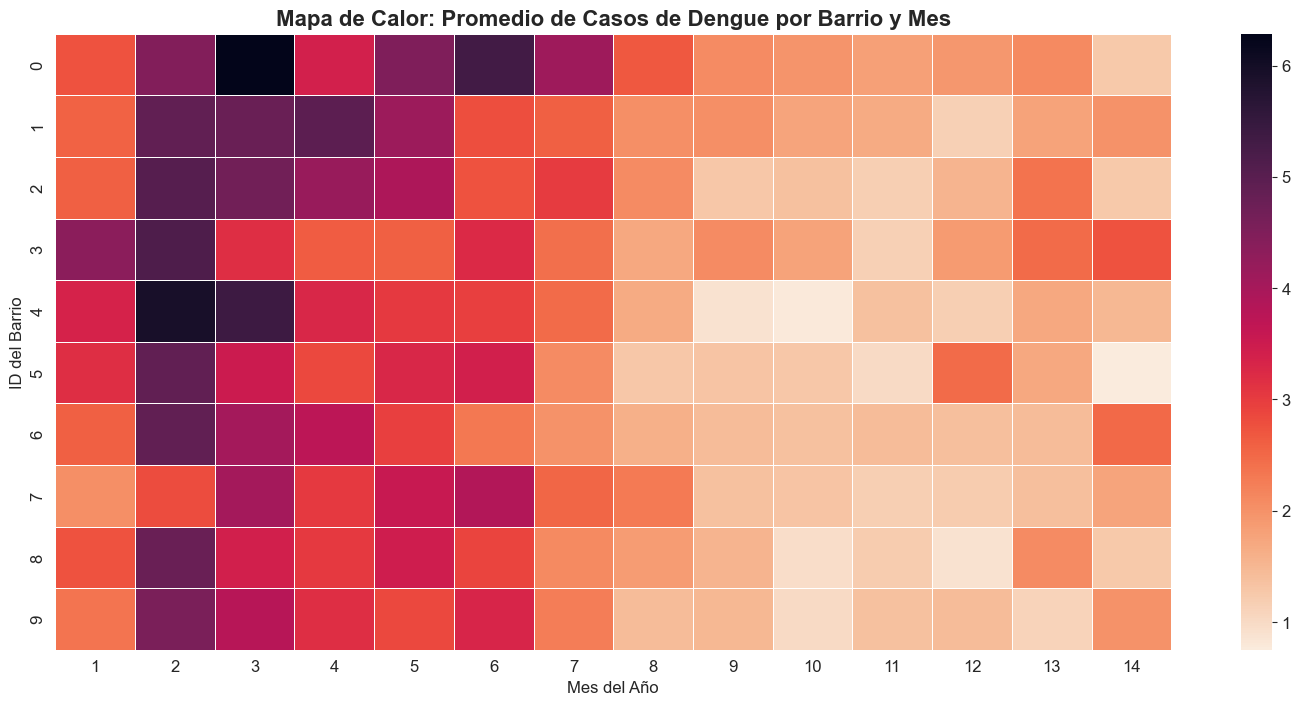

In [9]:
# --- Celda de Gr치fica de Mapa de Calor ---
import seaborn as sns
import matplotlib.pyplot as plt

print("Generando mapa de calor de casos por barrio y mes...")

if not df_train.empty:
    # Crear una columna de 'mes' para la agrupaci칩n
    df_heatmap = df_train.copy()
    df_heatmap['mes'] = ((df_heatmap['semana'] - 1) // 4) + 1
    
    # Agrupar los datos para crear la matriz del heatmap
    heatmap_data = df_heatmap.groupby(['id_bar', 'mes'])['dengue'].mean().unstack()

    plt.figure(figsize=(18, 8))
    sns.heatmap(heatmap_data, cmap='rocket_r', linewidths=.5)
    plt.title('Mapa de Calor: Promedio de Casos de Dengue por Barrio y Mes', fontsize=16, fontweight='bold')
    plt.xlabel('Mes del A침o')
    plt.ylabel('ID del Barrio')
    plt.show()

### An치lisis de resultados

* Las filas que son consistentemente m치s oscuras pertenecen a los barrios cr칩nicamente m치s afectados. Podemos identificar al instante los barrios 3, 4, 7, etc., como los que requieren mayor atenci칩n.

* Temporada Alta Identificada: Las columnas que son m치s oscuras nos muestran la "temporada de dengue" para toda la ciudad. T칤picamente, los colores se intensifican entre los meses 2 (Febrero) y 7 (Julio).

* Patrones Espacio-Temporales: Nos permite ver si todos los barrios se "encienden" al mismo tiempo o si el brote parece comenzar en ciertos barrios y luego extenderse.

### Mapa de Calor por barrio

Generando mapas de calor individuales por barrio usando el DataFrame 'df_train' ya cargado...


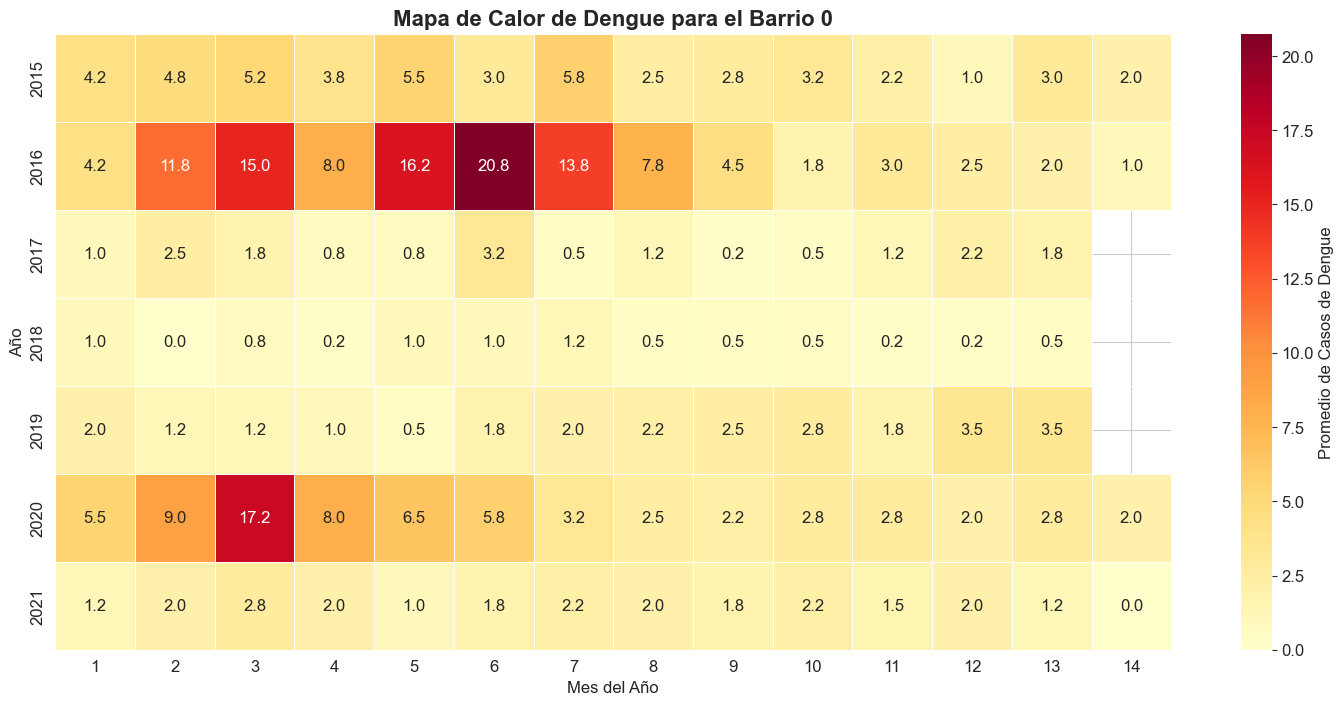

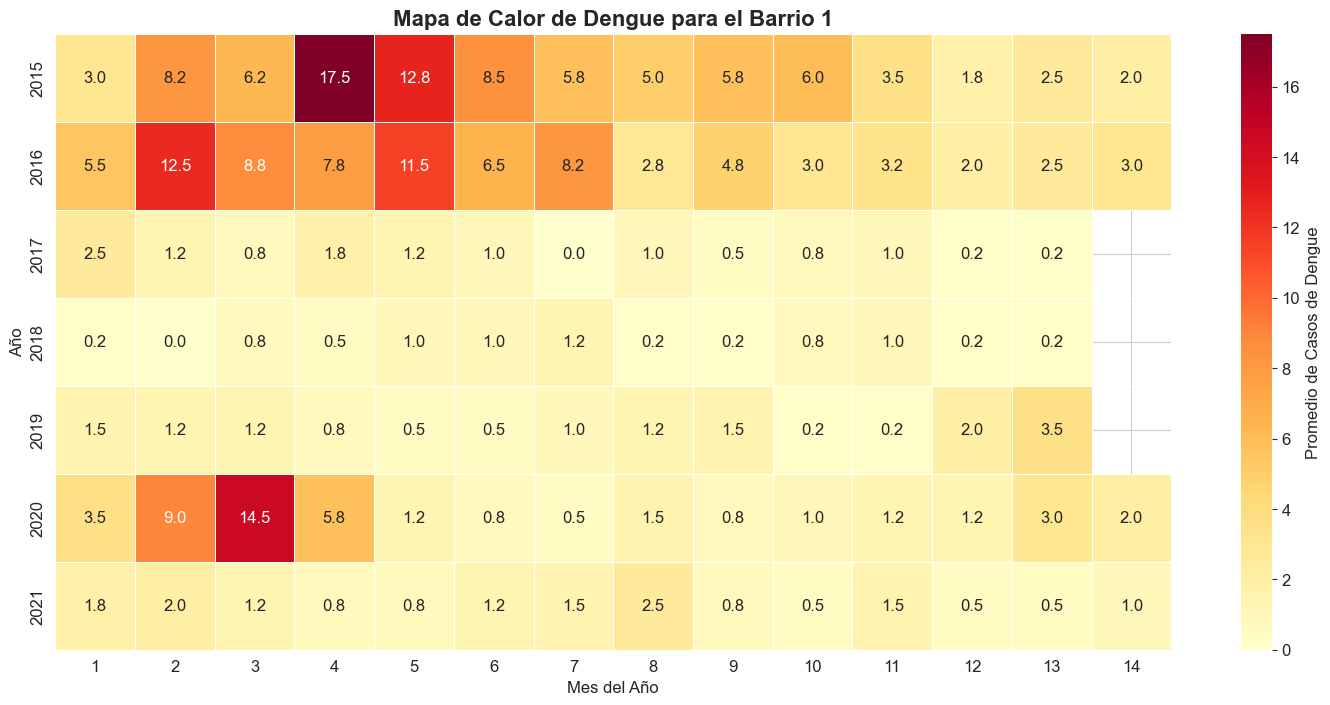

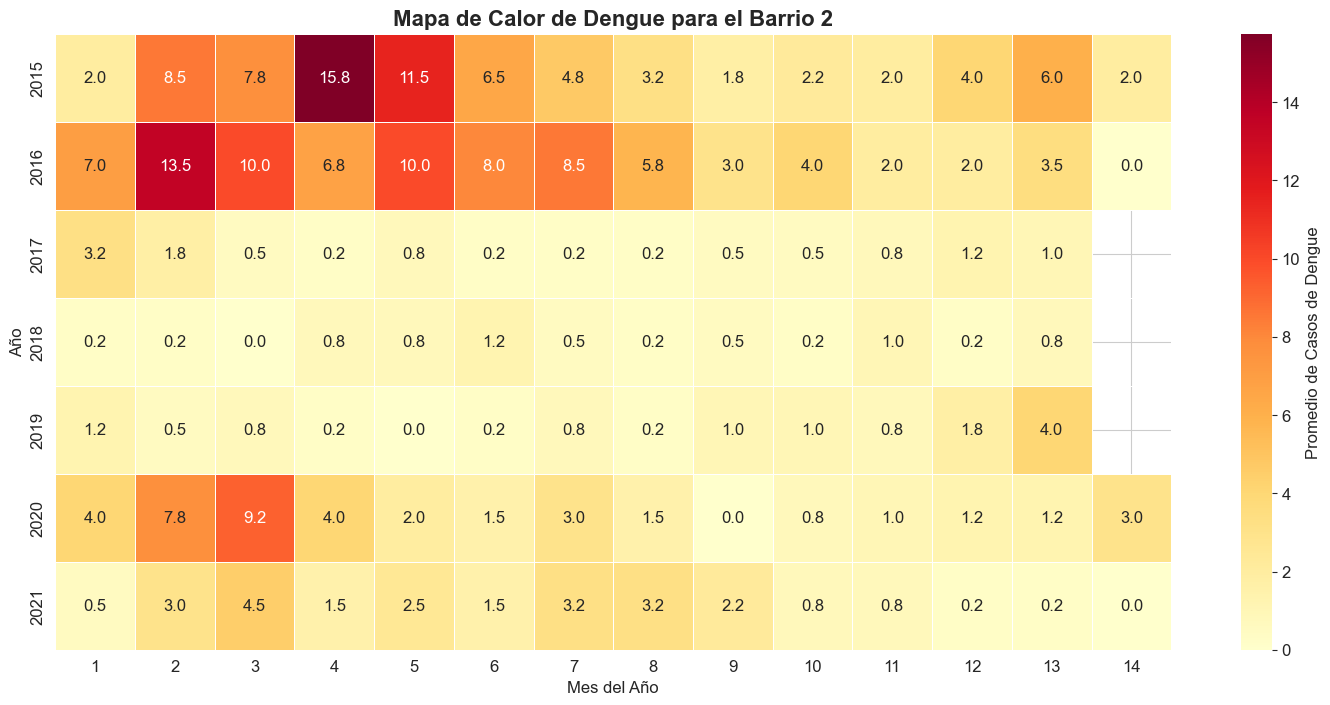

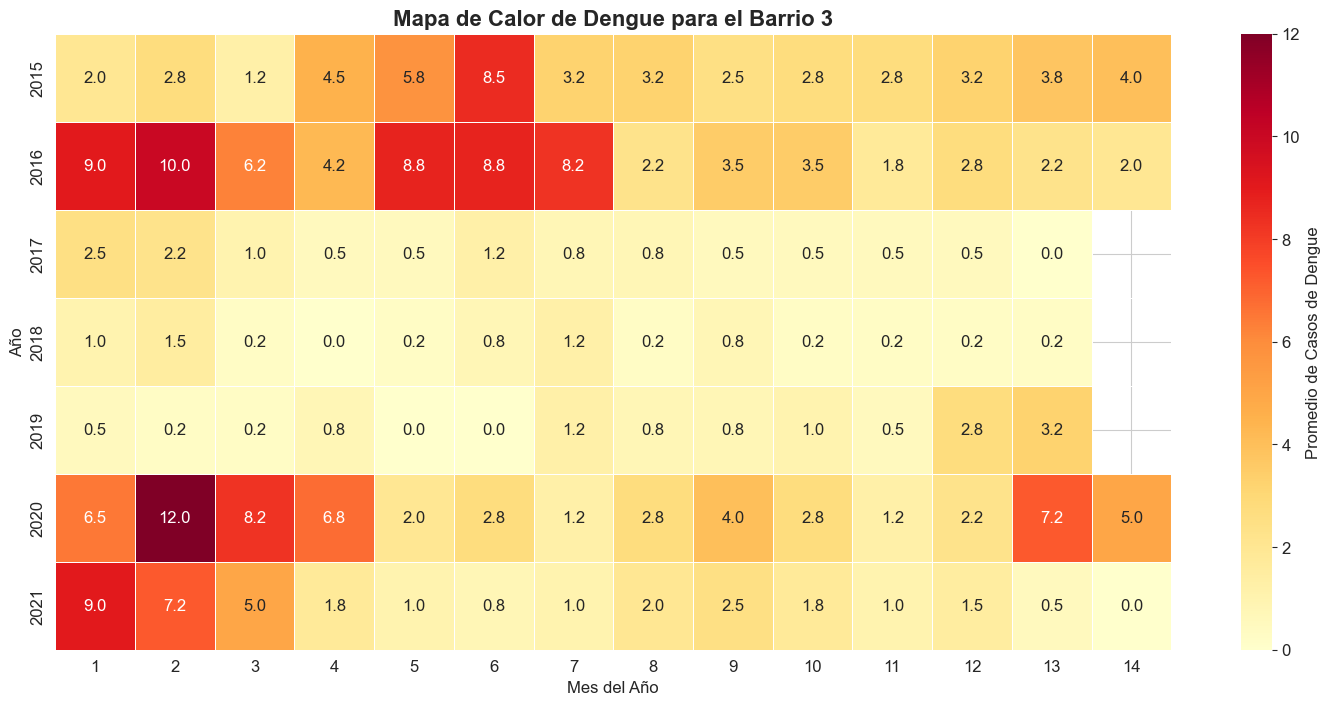

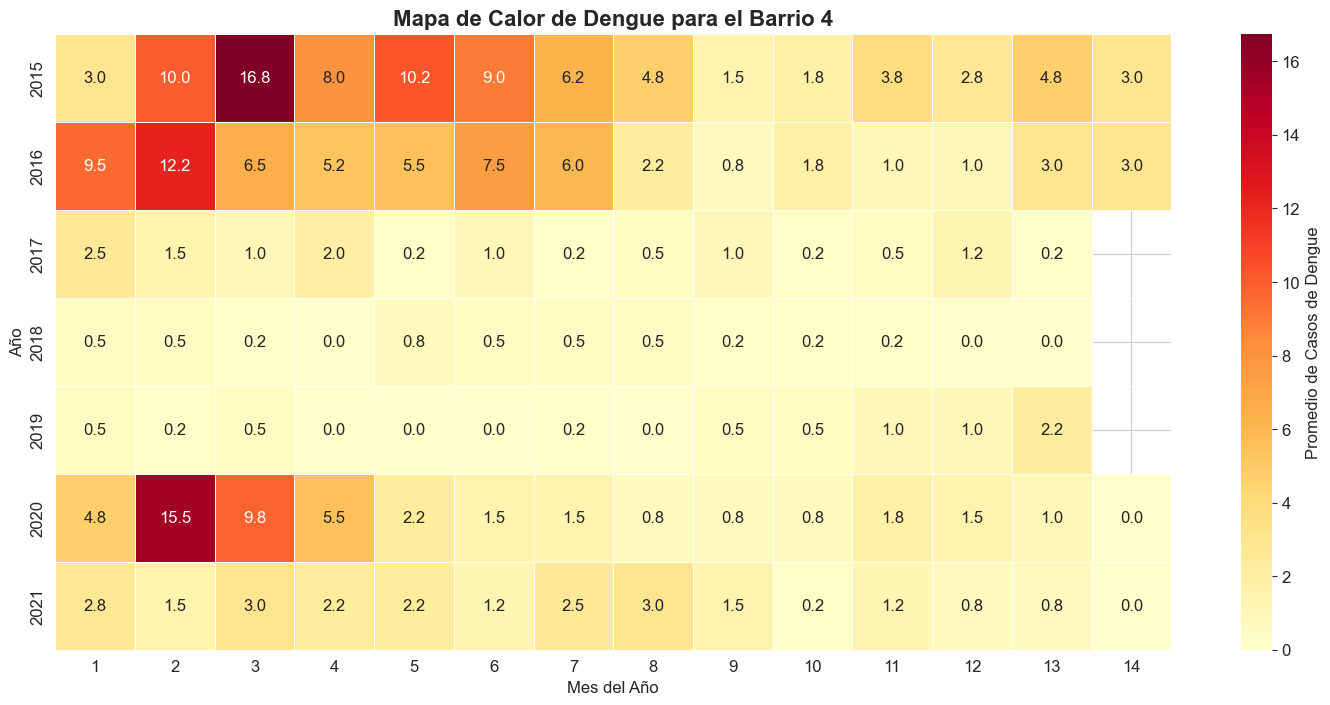

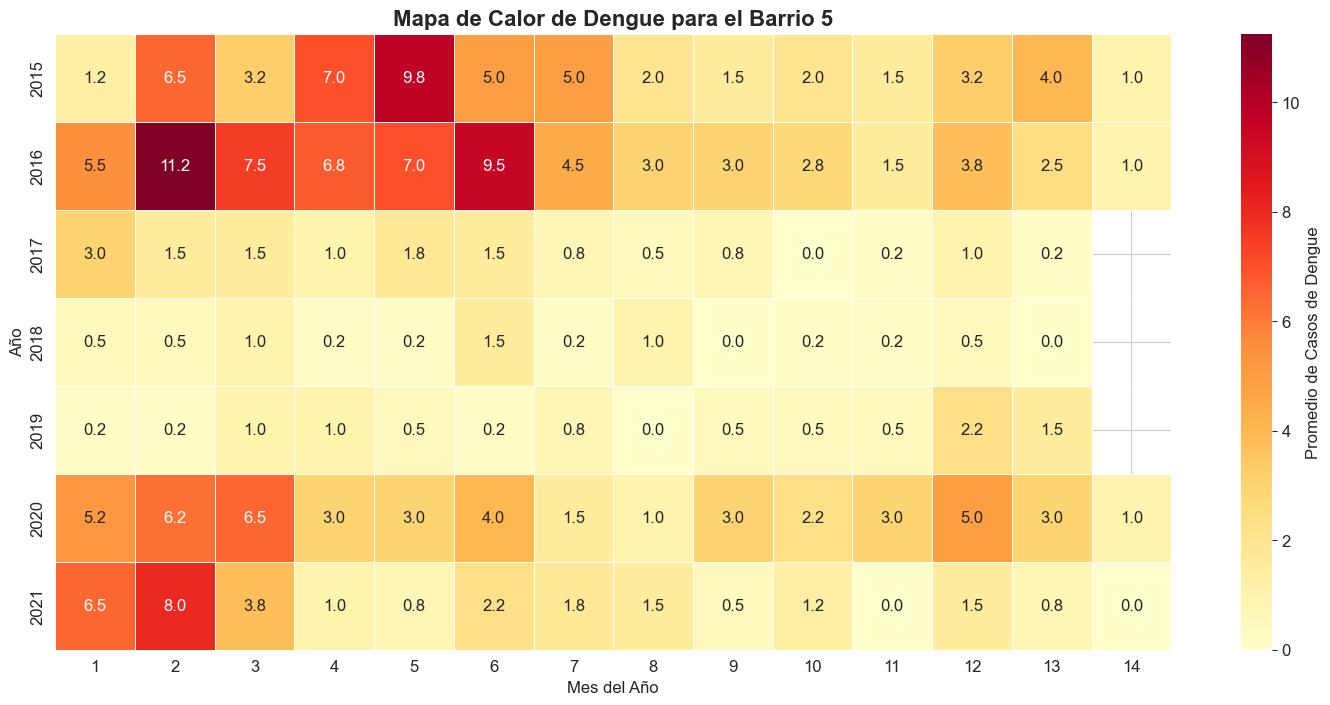

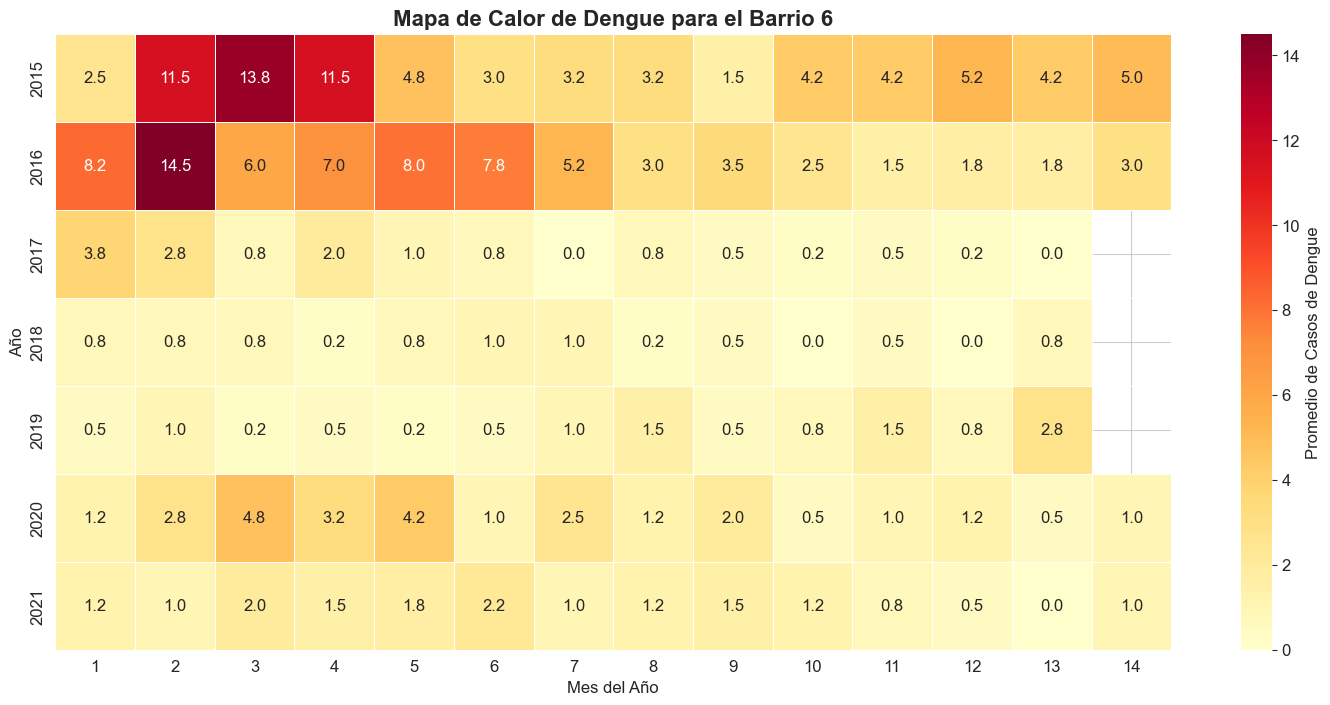

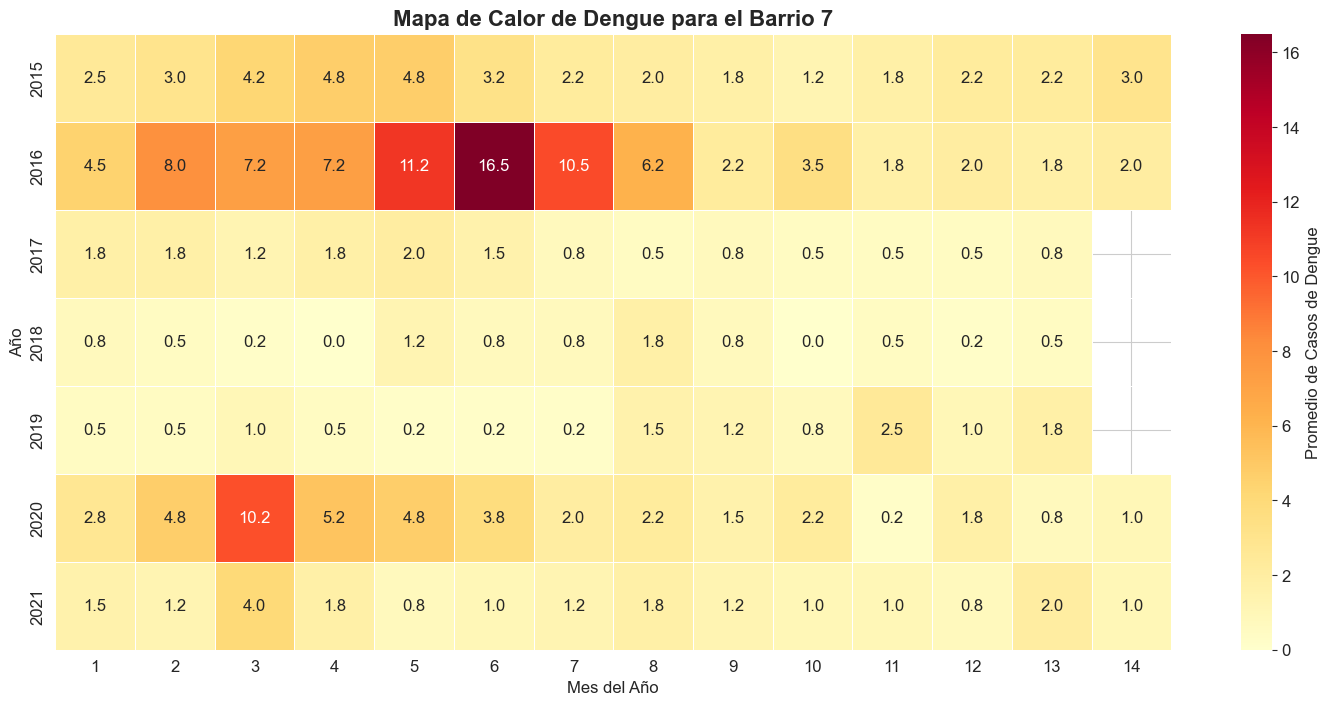

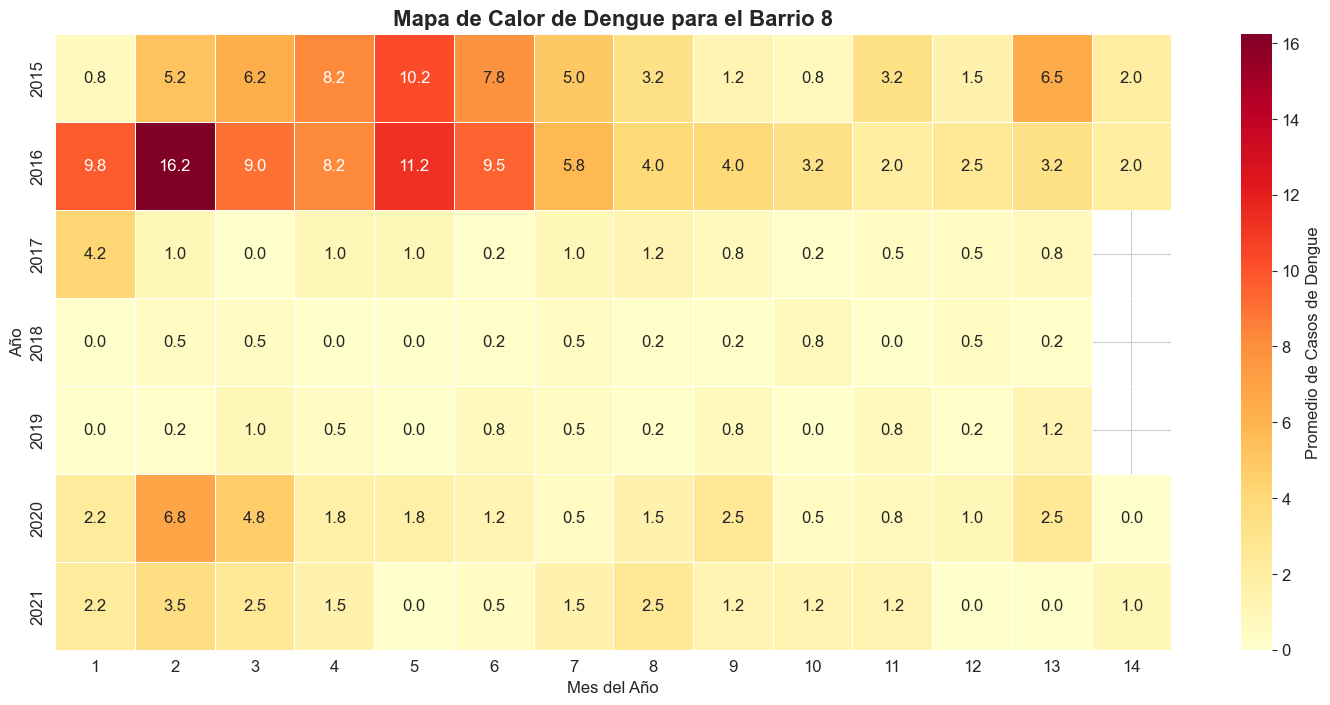

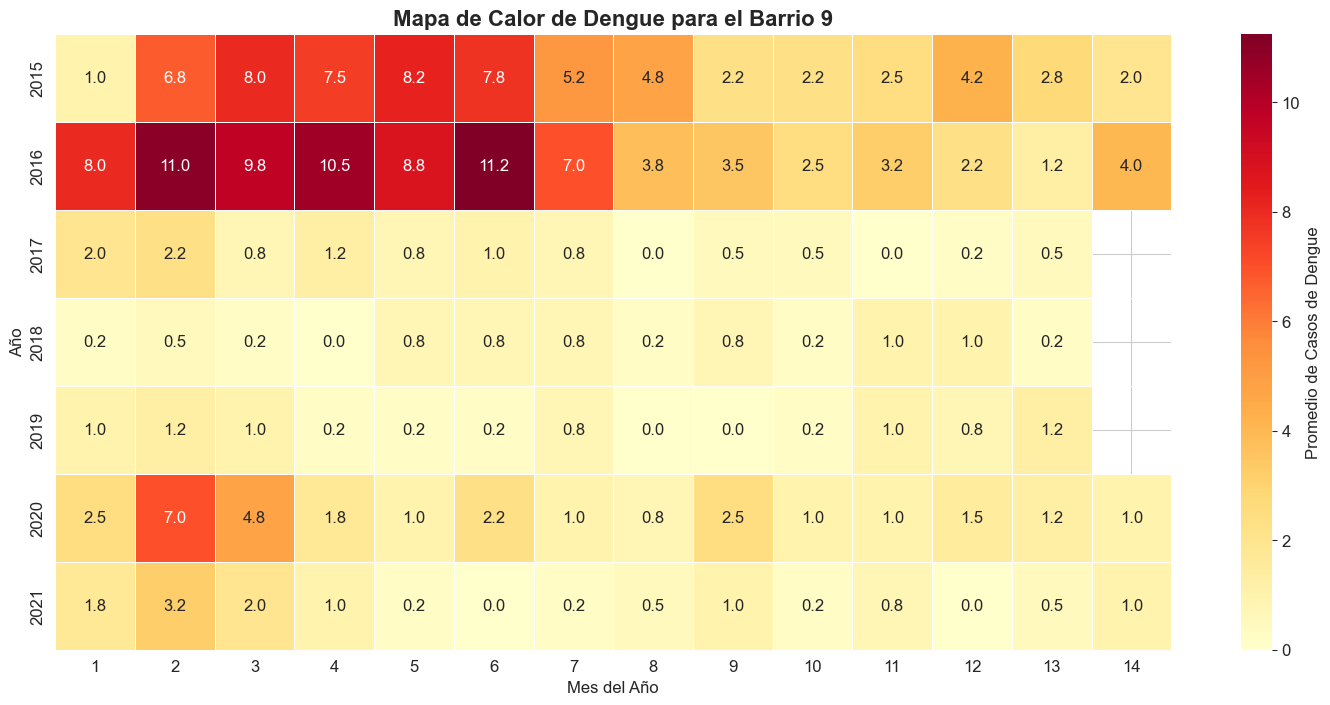

In [10]:
# --- Celda de Mapas de Calor Individuales por Barrio (Ajustada) ---
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Importamos numpy para el ordenamiento de barrios

print("Generando mapas de calor individuales por barrio usando el DataFrame 'df_train' ya cargado...")

# Verificamos que el DataFrame df_train exista y no est칠 vac칤o
if 'df_train' in locals() and not df_train.empty:
    
    # --- Preparaci칩n de Datos ---
    df_heatmap = df_train.copy()
    # Creamos una columna de mes para una mejor agrupaci칩n visual
    # Usamos una aproximaci칩n de 4 semanas por mes
    df_heatmap['mes'] = ((df_heatmap['semana'] - 1) // 4) + 1
    
    # Obtenemos la lista de barrios 칰nicos y la ordenamos para una visualizaci칩n consistente
    barrios_unicos = sorted(df_heatmap['id_bar'].unique())
    
    # --- Bucle para generar una gr치fica por cada barrio ---
    for barrio_id in barrios_unicos:
        
        # Filtrar los datos para el barrio actual
        df_barrio = df_heatmap[df_heatmap['id_bar'] == barrio_id]
        
        # Agrupar los datos para crear la matriz del heatmap (pivot table)
        heatmap_data = df_barrio.pivot_table(
            index='anio', 
            columns='mes', 
            values='dengue', 
            aggfunc='mean' # Usamos el promedio de casos del mes
        )
        
        # --- Creaci칩n de la Gr치fica ---
        plt.figure(figsize=(18, 8))
        sns.heatmap(
            heatmap_data, 
            cmap='YlOrRd',  # Paleta de colores: Amarillo (bajo) -> Naranja -> Rojo (alto)
            linewidths=.5,
            annot=True,     # Mostrar los n칰meros en cada celda
            fmt=".1f",      # Formatear los n칰meros a un decimal
            cbar_kws={'label': 'Promedio de Casos de Dengue'} # Etiqueta de la barra de color
        )
        
        plt.title(f'Mapa de Calor de Dengue para el Barrio {barrio_id}', fontsize=16, fontweight='bold')
        plt.xlabel('Mes del A침o')
        plt.ylabel('A침o')
        plt.show()

else:
    print("游뚿 ERROR: El DataFrame 'df_train' no est치 definido o est치 vac칤o. Por favor, aseg칰rate de ejecutar la celda de carga de datos primero.")


### An치lisis de resultados

* Barrios de Tendencia Larga (0, 4, 7, 8): Estos barrios muestran patrones estacionales m치s consistentes y predecibles. Sus brotes son largos y tienden a seguir ciclos anuales claros. Para ellos, una ventana de tiempo m치s grande es ideal para capturar la tendencia completa. LOOK_BACK 칍ptimo: 12 semanas.

* Barrios de Reacci칩n R치pida (1, 6, 9): Estos barrios tienen brotes que, aunque estacionales, parecen ser m치s cortos y reactivos a las condiciones clim치ticas inmediatas. Un LOOK_BACK m치s corto podr칤a permitir al modelo reaccionar m치s 치gilmente. LOOK_BACK 칍ptimo: 8 semanas.

* Barrios "Explosivos" y Err치ticos (2, 3, 5): Estos son los barrios problem치ticos. Sus mapas de calor muestran picos muy agudos y repentinos, a veces en meses inesperados. Una memoria larga puede ser perjudicial aqu칤, ya que el "ruido" de semanas pasadas puede confundir al modelo. Necesitan un modelo que se enfoque intensamente en el pasado m치s reciente.

LOOK_BACK 칍ptimo: 4 semanas.

#  GRafica 8: Ciclo Estacional (Seasonal Plot)

Generando gr치fica de ciclo estacional...


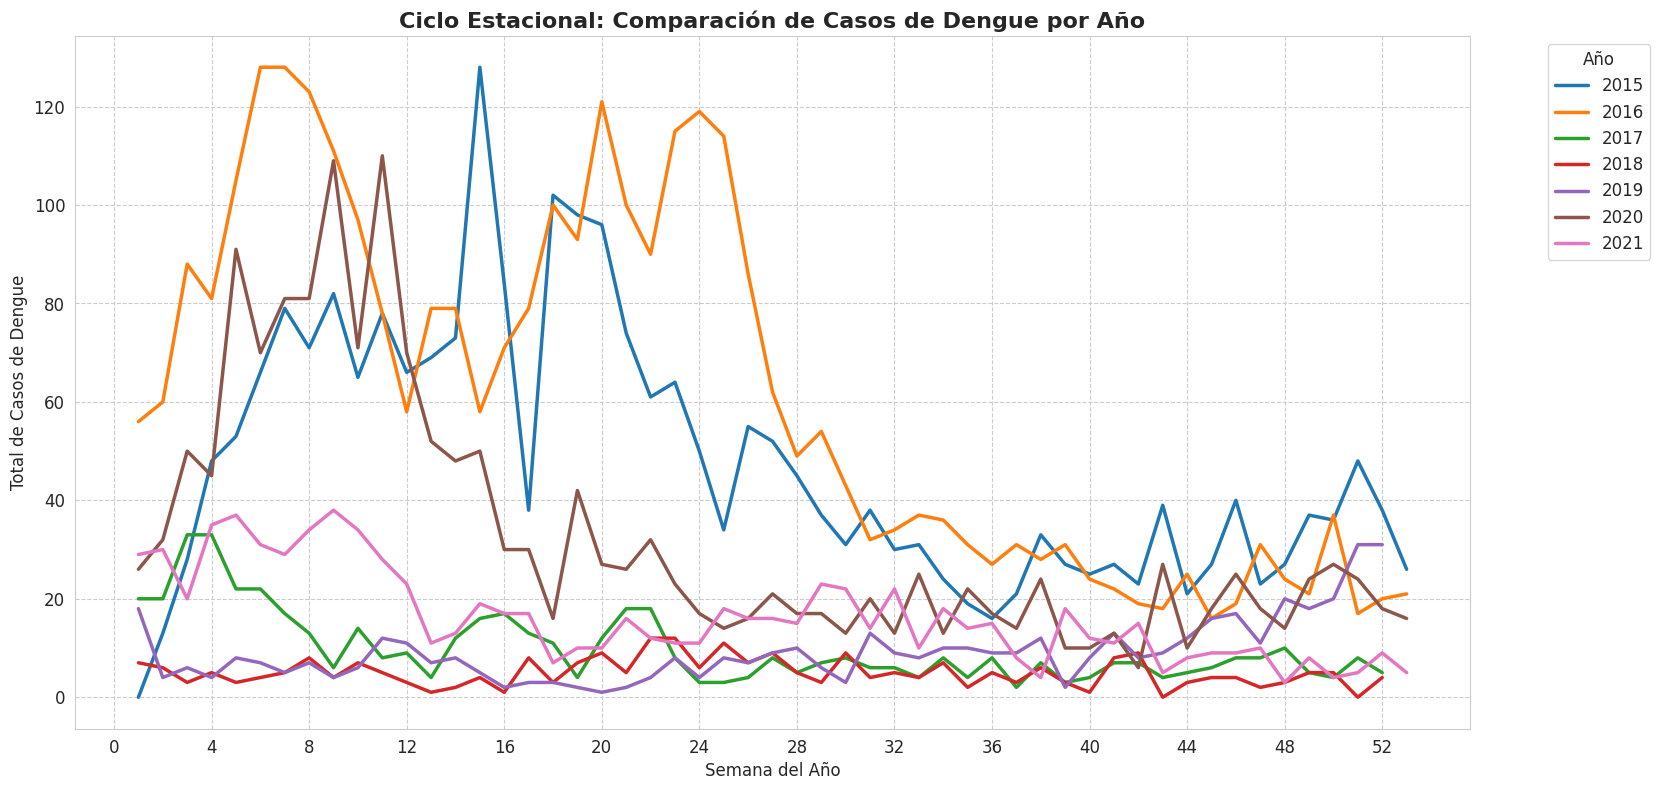

In [11]:
# --- Celda de Gr치fica de Ciclo Estacional ---
import seaborn as sns
import matplotlib.pyplot as plt

print("Generando gr치fica de ciclo estacional...")

if not df_train.empty:
    # Agrupar los casos totales por a침o y semana
    df_seasonal = df_train.groupby(['anio', 'semana'])['dengue'].sum().reset_index()
    
    plt.figure(figsize=(18, 9))
    sns.lineplot(data=df_seasonal, x='semana', y='dengue', hue='anio', palette='tab10', legend='full', linewidth=2.5)
    plt.title('Ciclo Estacional: Comparaci칩n de Casos de Dengue por A침o', fontsize=16, fontweight='bold')
    plt.xlabel('Semana del A침o')
    plt.ylabel('Total de Casos de Dengue')
    plt.xticks(np.arange(0, 53, 4)) # Marcas en el eje X cada 4 semanas
    plt.legend(title='A침o', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='both', linestyle='--')
    plt.show()

### An치lisis de resultados

* Todos los a침os (excepto los del "valle") tienen una forma similar: una subida, un pico y una bajada. Sin embargo, la altura del pico (magnitud) y la semana exacta en que ocurre (timing) var칤an enormemente de un a침o a otro.

* Visualizaci칩n del Outlier: Esta es la gr치fica m치s dram치tica para ver c칩mo los a침os 2017, 2018 y 2019 son anomal칤as completas, representadas como l칤neas planas en la parte inferior.

* El Desaf칤o del Modelo: El desaf칤o para nuestro modelo es doble: debe aprender la forma general de la curva estacional, pero tambi칠n ser lo suficientemente flexible para adaptarse a la variabilidad en la magnitud y el timing de cada a침o, bas치ndose en las condiciones clim치ticas de ese a침o espec칤fico.

# Conclusiones

* *Conclusi칩n 1:*  La Din치mica del Dengue NO es Uniforme, es una "Colecci칩n de Micro-Epidemias".
Evidencia: El Mapa de Calor (Gr치fica 7) y el gr치fico de Incidencia Promedio por Barrio (Gr치fica 3) son contundentes. Muestran alta variaci칩n entre los barrios. Un modelo 칰nico para toda la ciudad est치 destinado a fallar porque promediar칤a los comportamientos. Nuestra estrategia de un modelo por barrio no es una opci칩n, es un requisito fundamental para el 칠xito.

* *Conclusi칩n 2:* La Relaci칩n Clima-Dengue Tiene "Memoria" (El Efecto Retardado). La importancia de los Lags del Random Forest es la prueba m치s s칩lida. Nos demuestra que el clima de las semanas pasadas es mucho m치s predictivo que el clima de ayer. La importancia se concentra en un "punto dulce" que, dependiendo del barrio, se encuentra entre las 4 y las 16 semanas. La estrategia debe ser encontrar el LOOK_BACK 칩ptimo para cada barrio (o usar uno robusto como 12) es crucial.

* *Conclusi칩n 3:* La Predicci칩n de Picos es un Problema de "Escala", no de "Fuerza". La Distribuci칩n de Casos (Gr치fica 2) revel칩 que los picos son eventos raros pero extremos. Esto causa que los modelos est치ndar, que buscan minimizar el error cuadr치tico, sean "castigados" severamente si se arriesgan a predecir un pico y fallan. Como resultado, aprenden a ser conservadores. La transformaci칩n logar칤tmica es una herramienta m치s potente para resolver esto. Al cambiar la escala, permitimos que el modelo aprenda a capturar la magnitud de los picos sin un miedo paralizante al error.

* *Conclusi칩n 4:* El Historial de Datos Contiene "Ruido" y "Se침al" que Debemos Separar. La Comparaci칩n de Ciclos Anuales (Gr치fica 8) y la gr치fica de Casos Totales por A침o (Gr치fica 1) muestran de forma dram치tica que los a침os 2017, 2018 y 2019 son anomal칤as. No siguen el patr칩n epid칠mico del resto de los a침os. Ense침ar a un modelo a predecir picos usando datos que en su mayor칤a dicen "no hay picos" es contraproducente. Esto justifica la estrategia de filtrado de datos: para el modelo cuyo 칰nico objetivo es cazar picos, debemos entrenarlo solo con los a침os que contienen la "se침al" de una epidemia real.